#**Assignment-3**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/penguins_size.csv')
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


<ipython-input-5-5906f08a3de5>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['culmen_depth_mm'],ax=axes[1,1])


<Axes: >

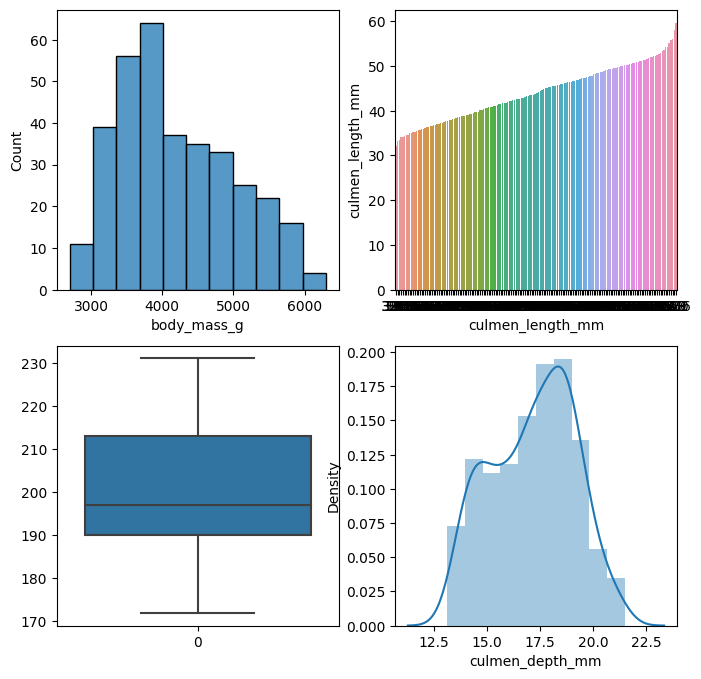

In [ ]:
from matplotlib import rcParams
rcParams['figure.figsize']=8,8
fig,axes=plt.subplots(2,2)
sns.histplot(data=df['body_mass_g'],ax=axes[0,0])
sns.distplot(df['culmen_depth_mm'],ax=axes[1,1])
sns.barplot(x=df['culmen_length_mm'],y=df['culmen_length_mm'],ax=axes[0,1])
sns.boxplot(data=df['flipper_length_mm'],ax=axes[1,0])

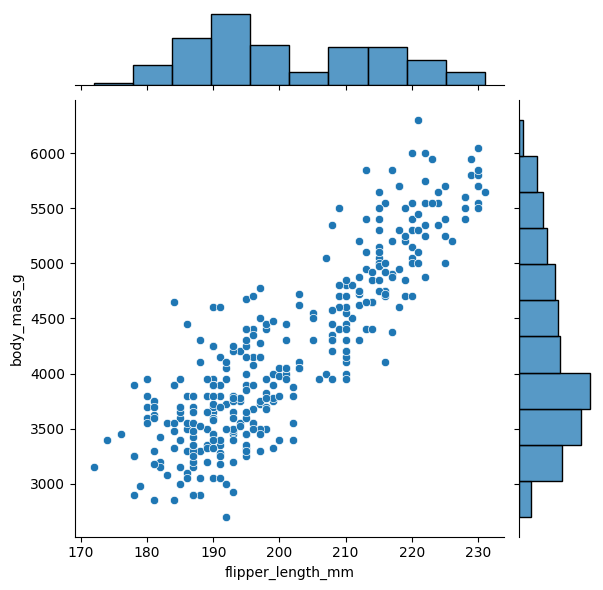

In [ ]:
sns.jointplot(x='flipper_length_mm',y='body_mass_g',data=df)
plt.show()

<ipython-input-8-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

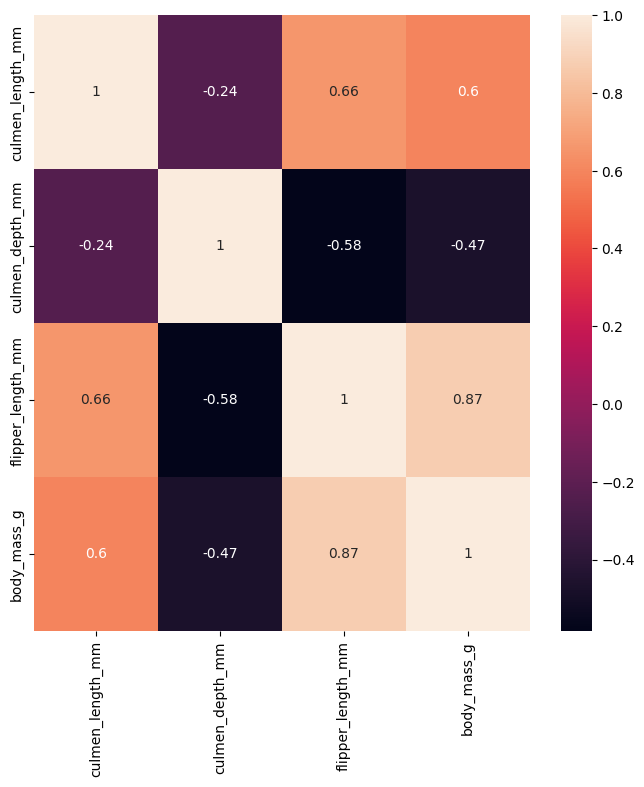

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [4]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [19]:
df.isnull().any()
df['culmen_length_mm'].fillna(df['culmen_length_mm'].median(),inplace=True)
df['flipper_length_mm'].fillna(df['flipper_length_mm'].median(),inplace=True)
df['culmen_depth_mm'].fillna(df['culmen_depth_mm'].median(),inplace=True)
df['body_mass_g'].fillna(df['body_mass_g'].median(),inplace=True)
most_frequent_category = df['sex'].mode()[0]
df['sex'].fillna(most_frequent_category, inplace=True)
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.50,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.30,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,44.45,17.3,197.0,4050.0,MALE
4,Adelie,Torgersen,36.70,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,44.45,17.3,197.0,4050.0,MALE
340,Gentoo,Biscoe,46.80,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.40,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.20,14.8,212.0,5200.0,FEMALE


<Axes: >

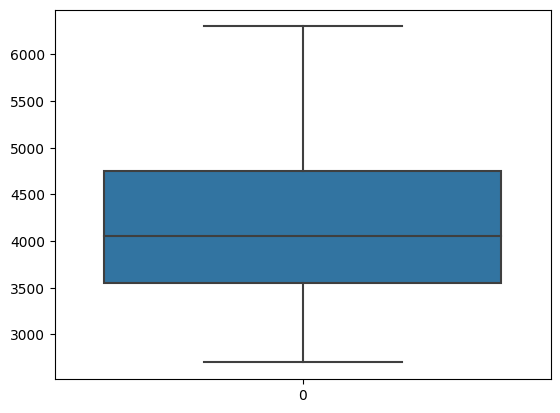

In [10]:
sns.boxplot(df.body_mass_g)


In [12]:
q1=df.body_mass_g.quantile(0.25)
q3=df.body_mass_g.quantile(0.75)
IQR=q3-q1
upper_limit = q3+1.5*IQR
lower_limit =q1-1.5*IQR
df.median()

<ipython-input-12-ef88e168ffba>:6: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


culmen_length_mm       44.45
culmen_depth_mm        17.30
flipper_length_mm     197.00
body_mass_g          4050.00
dtype: float64

In [15]:
df['body_mass_g'] = np.where(df['body_mass_g']>upper_limit,30,df['body_mass_g'])
df


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.50,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.30,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,44.45,17.3,197.0,4050.0,NaN
4,Adelie,Torgersen,36.70,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,44.45,17.3,197.0,4050.0,NaN
340,Gentoo,Biscoe,46.80,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.40,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.20,14.8,212.0,5200.0,FEMALE


<Axes: >

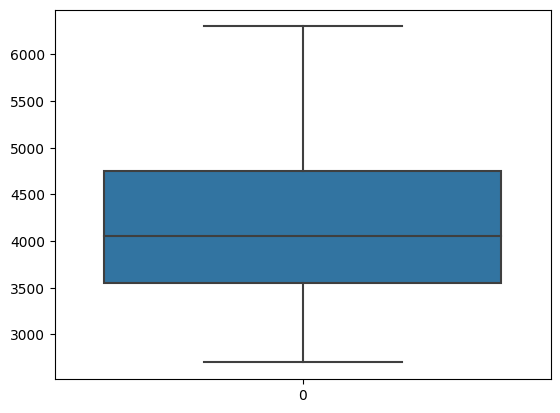

In [16]:
sns.boxplot(df.body_mass_g)

In [18]:
correlation_matrix = df.corr()
correlation_with_target = correlation_matrix['body_mass_g']
print(correlation_with_target)

culmen_length_mm     0.594925
culmen_depth_mm     -0.471942
flipper_length_mm    0.871221
body_mass_g          1.000000
Name: body_mass_g, dtype: float64


<ipython-input-18-ed6c685867b9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


In [29]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df.sex=le.fit_transform(df.sex)
df.species=le.fit_transform(df.species)
df.island=le.fit_transform(df.island)

In [30]:
X=df.drop('body_mass_g',axis=1)
y=df['body_mass_g']


In [31]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_scaled= pd.DataFrame(sc.fit_transform(X),columns =X.columns)
X_scaled.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,sex
0,-1.029802,1.844076,-0.887622,0.787289,-1.420541,0.960230
1,-1.029802,1.844076,-0.814037,0.126114,-1.063485,-1.017729
2,-1.029802,1.844076,-0.666866,0.431272,-0.420786,-1.017729
3,-1.029802,1.844076,0.096581,0.075255,-0.277964,0.960230
4,-1.029802,1.844076,-1.329133,1.092447,-0.563608,-1.017729


In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42)
X_train.shape

(275, 6)

In [34]:
X_test.shape

(69, 6)